# Requerimentos

In [1]:
import pandas as pd 
import numpy as np
import scipy as sp
import random 
import collections

import seaborn as sns
from matplotlib import pyplot as plt


# Introdução




## Enunciado contextualizado

Joãozinho ganhou de presente de seu pai um álbum da copa de seu pai com 210 figurinhas, com 20 Alisson, 19 Vini Junior, 18 Casemiro, 17 Coutinho, e assim por diante até 1 Neymar. Joãozinho decide dividir algumas de suas figurinhas com seu melhor amigo Pedrinho, e eles decidem jogar um jogo. Pedrinho iria retirar quantas figurinhas conseguisse de dentro da bolsa da qual Joãozinho guarda suas figurinhas até que o Neymar aparecesse. Pedrinho ficaria com todas as figurinhas exceto a do Neymar (o jogador favorito de Joãozinho). Se **k** for o maior número de figurinhas do mesmo jogador que Pedrinho recebeu. Qual o valor esperado de **k**?

Por exemplo, se Pedrinho retirar a seguinte sequência de figurinhas: {Richarlysson, Alisson, Alisson, Richarlysson, Marquinhos, Richarlysson, Marquinhos, Alisson, Neymar}, então Pedrinho receberá 8 figurinhas, e o valor de k será igual à 3.

Seja n o número de figurinhas distintas. Considere a figurinha favorita como sendo aquela que possui somente uma unidade, referente ao jogador 1, e para os demais jogadores j = 2,3,...,n, Joãozinho possui j unidades de sua figurinha. Resolva os seguintes problemas para os valores de n. E o total de figurinhas é igual à seguinte fórmula (progressão aritmética):

\[N = n_1 + n_2 + n_3 + ... + n_n = 1 + 2 + 3 + ... + n = \frac{n}{2}(n+1)\]

* n = 2, N = 3.
* n = 3, N = 6
* n = 20, N = 210

## Enunciado para mentes matemáticas

In [2]:
def cria_lista_cards(n_jogador):
    
    #
    lista1 = [f'jogador{i+1}' for i in range(n_jogador)]

    #
    lista2 = [i+1 for i in range(n_jogador)]
    
    #
    lista3 = []
    
    #
    aux = []
    
    #
    for a in range(len(lista1)):
        aux = [lista1[a]] * lista2[a]
        n = len(aux)
        for b in range(n):
            lista3.append(aux[b])
            
    return lista3


def realiza_sorteio(n,lista3,jogador_favorito):
    
    k = []
    cards = []
    
    for i in range(n):
        globals()[f'sorteio{i+1}'] = []
        globals()[f'resultado{i+1}'] = []
        globals()[f'sorteio{i+1}'] = random.sample(lista3, len(lista3))
        globals()[f'sorteio{i+1}'] = globals()[f'sorteio{i+1}'][:globals()[f'sorteio{i+1}'].index(jogador_favorito)]
        globals()[f'resultado{i+1}'] = collections.Counter(globals()[f'sorteio{i+1}'])
        if globals()[f'resultado{i+1}'] == {}:
            k.append(0)
            cards.append('')
        else:    
            k.append(max(globals()[f'resultado{i+1}'].values()))
            cards.append(max(globals()[f'resultado{i+1}'], key = globals()[f'resultado{i+1}'].get))
            
    return k, cards

# Pipeline da solução

## Gerando a lista de jogadores

In [4]:
#
lista3 = cria_lista_cards(n_jogador = 20)

#
collections.Counter(lista3)

Counter({'jogador1': 1,
         'jogador2': 2,
         'jogador3': 3,
         'jogador4': 4,
         'jogador5': 5,
         'jogador6': 6,
         'jogador7': 7,
         'jogador8': 8,
         'jogador9': 9,
         'jogador10': 10,
         'jogador11': 11,
         'jogador12': 12,
         'jogador13': 13,
         'jogador14': 14,
         'jogador15': 15,
         'jogador16': 16,
         'jogador17': 17,
         'jogador18': 18,
         'jogador19': 19,
         'jogador20': 20})

## Gerando o sorteio M vezes para gerar a distribuição de k

In [9]:
#
k,cards = realiza_sorteio(n = 15000, lista3 = lista3, jogador_favorito = 'jogador1')

#
np.mean(k)

11.360066666666667

## Gráfico da distribuição do vetor k

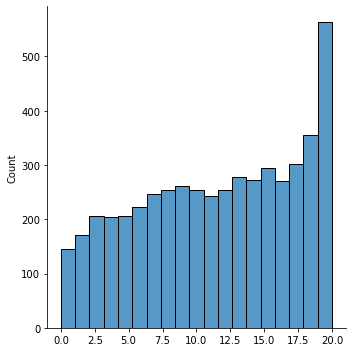

In [6]:
sns.displot(k)